# Implementation of Optimization algorithm


In [67]:
# Apply linear regression on weight-height.csv dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data from csv file
data = pd.read_csv('SAT-GPA.csv')
data.head()
#remove null values
data=data.dropna()



In [68]:
#check if there are any null values
data.isnull().sum()


SAT    0
GPA    0
dtype: int64

In [69]:
#prepare x and y 

x=data['SAT'].values
y=data['GPA'].values



In [70]:
#apply linear regression
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
x=x.reshape(-1,1)
reg.fit(x,y)
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)


Coefficients: [0.00156111]
Intercept: 0.47126246455052323


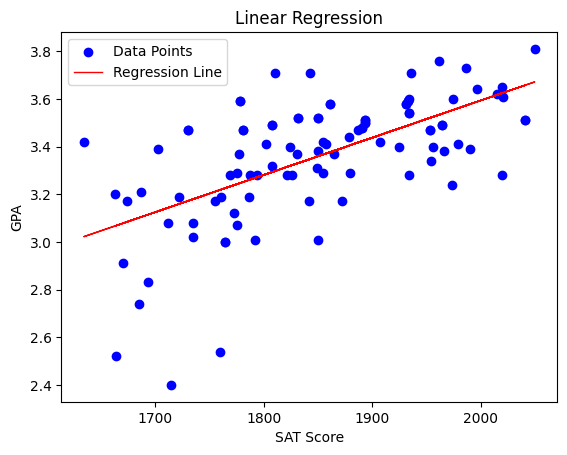

In [71]:
#plot the regression line

plt.scatter(x,y,color='blue',label='Data Points')
plt.plot(x,reg.predict(x),color='red',linewidth=1, label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.legend()
plt.show()


## Apply Stochastic Gradient Descent

Coefficients: [0.14903386]
Intercept: [3.30557202]


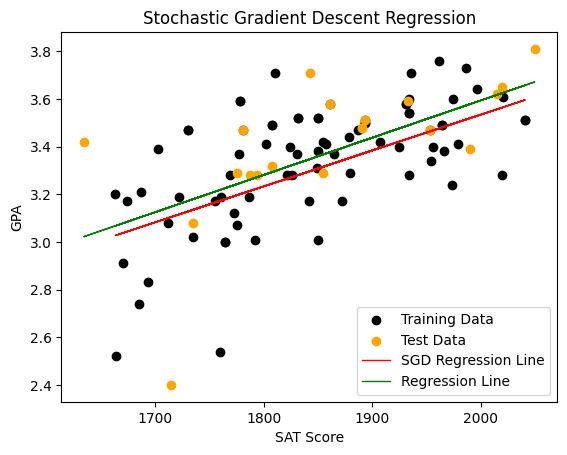

In [72]:

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Feature scaling for SGD
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply stochastic gradient descent (SGD) for linear regression
sgd_reg = SGDRegressor(max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(x_train_scaled, y_train)

# Print the coefficients and intercept
print('Coefficients:', sgd_reg.coef_)
print('Intercept:', sgd_reg.intercept_)

# Plot the regression line
plt.scatter(x_train, y_train, color='black', label='Training Data')
plt.scatter(x_test, y_test, color='orange', label='Test Data')
plt.plot(x_train, sgd_reg.predict(x_train_scaled), color='red', linewidth=1, label='SGD Regression Line')
plt.plot(x,reg.predict(x),color='green',linewidth=1, label='Regression Line')
plt.title('Stochastic Gradient Descent Regression')
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.legend()
plt.show()
